Simple Linear Regression 

1.Divide the feature based on independent and dependent features 

2.Train test split of the dataset 

In [9]:
import pandas as pd 


In [10]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [11]:
##Read the dataset 

df=pd.read_csv('heightandweight.csv')
df.head()

,Height,Weight
0,150,45
1,152,48
2,155,50
3,157,52
4,160,55


In [12]:
df

,Height,Weight
0,150,45
1,152,48
2,155,50
3,157,52
4,160,55
5,162,58
6,165,60
7,167,62
8,170,65
9,172,68


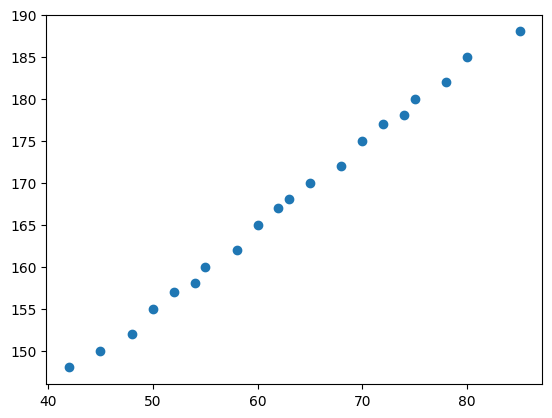

In [13]:
plt.scatter(df['Weight'],df['Height'])

In [23]:
##divide dataset into independent and dependent features 
X=df[['Weight']] #independent feartues 

y=df['Height'] #dependent features 

In [24]:
X

,Weight
0,45
1,48
2,50
3,52
4,55
5,58
6,60
7,62
8,65
9,68


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [27]:
X.shape

(20, 1)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16, 1), (4, 1), (16,), (4,))

In [29]:
##Standardise the dataset train the independent data 
from sklearn.preprocessing import StandardScaler


In [30]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform()

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

c:\DATA_SCIENCE_ML_NLP\dsvenv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


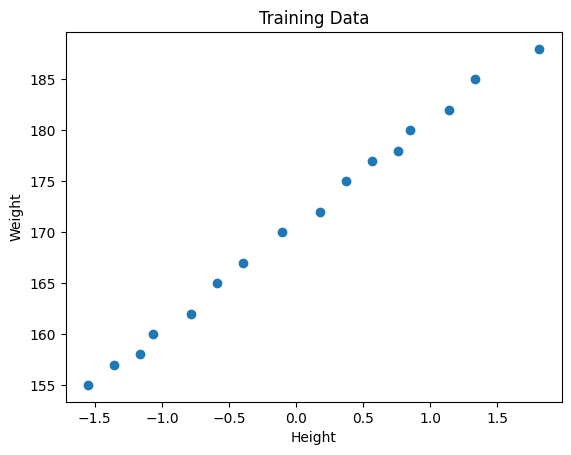

In [35]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Training Data")
plt.show()


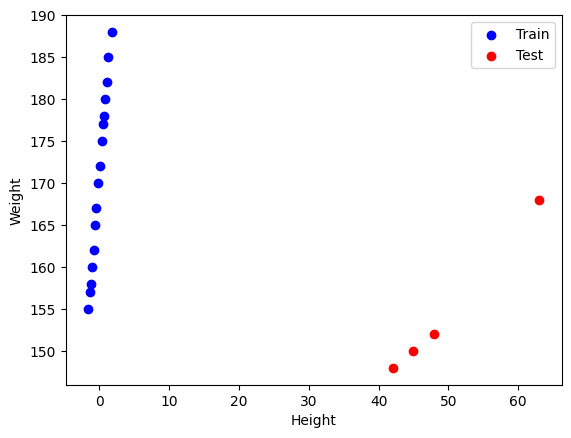

In [36]:
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')

plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()


In [37]:
##Train the simple LInear regression model 
from sklearn.linear_model import LinearRegression


In [38]:
regressor=LinearRegression()


In [39]:
regressor.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [41]:
print("The slope or coifficient of weight is ",regressor.coef_)
print("Interept :",regressor.intercept_)

The slope or coifficient of weight is  [10.18080886]
Interept : 170.6875


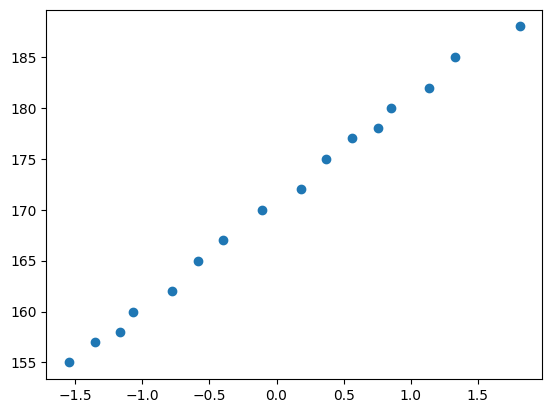

In [42]:
plt.scatter(X_train,y_train)

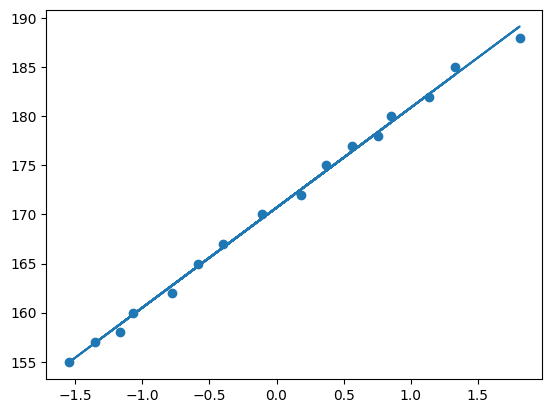

In [44]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

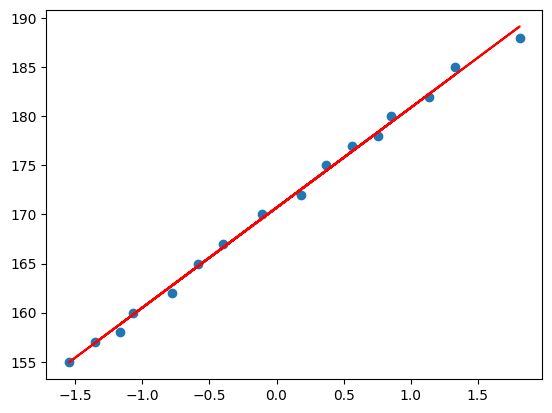

In [45]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [46]:
##prediction of train data 

y_pred_test=regressor.predict(X_test)


In [47]:
y_pred_test,y_test

(array([628.82389866, 812.07845813, 598.28147209, 659.36632524]),
 0     150
 17    168
 15    148
 1     152
 Name: Height, dtype: int64)

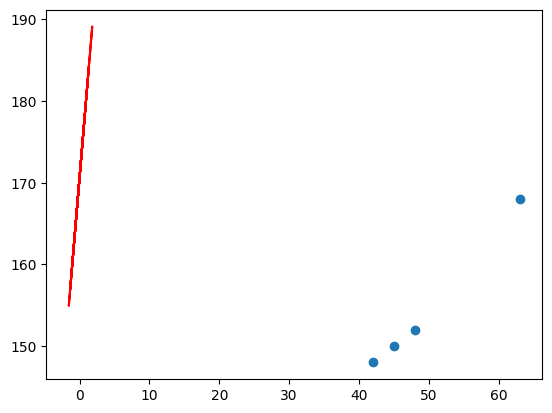

In [49]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),'r')

In [50]:
##Performance Metrics 

##MSE,MAE,RMSE,
#R square and adjusted R square 



In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [52]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

276070.84456216806
520.1375385296524
525.4244422961003


In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [54]:
score

-4398.535371508654

In [55]:
#Adjusted R square 

regressor

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [61]:
##new data point weight is 80 
scaled_weight=scaler.transform([[80]])
scaled_weight

array([[80.]])

In [62]:
regressor.predict([scaled_weight[0]])

array([985.15220873])

In [63]:
scaled_weight[0]

array([80.])

In [64]:
print("The height prediction for weight 80 kg is ",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is  [985.15220873]


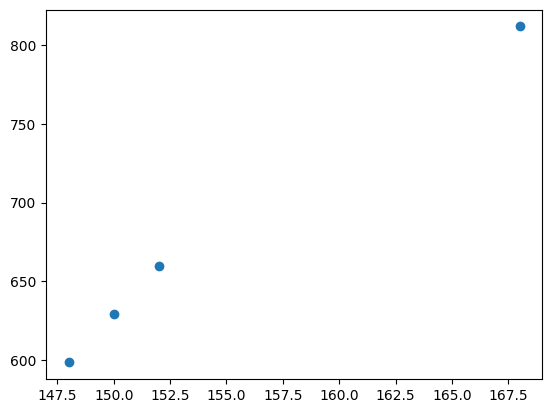

In [67]:
##Assumption 
##plot a scatter plot for th eprediction 
plt.scatter(y_test,y_pred_test)

In [68]:
# Resual
residuals=y_test-y_pred_test
residuals

0    -478.823899
17   -644.078458
15   -450.281472
1    -507.366325
Name: Height, dtype: float64

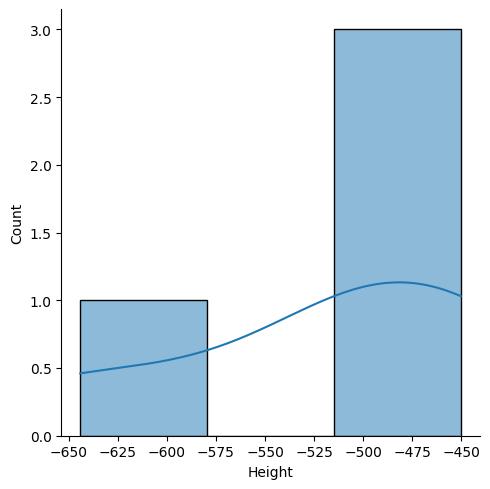

In [69]:
##plot this residuals  
import seaborn as sns
sns.displot(residuals,kde=True)

##pickling the mode 
Python pickle module is used for serialising and de-serailising a pyhon 
object  in python can be saved on disk.What pickle does is that it "seriliees " the ovject first 
before writing it to file . Pickeling is way  to covert a pthon object (
    list ,dict etc 
 into a ) character  stream . The idea is that this character stream contains all the inforamtion necessary the objject in snothere python 
# script 


In [74]:
import pickle 
pickle.dump(regressor,open('regressor.pkl','wb'))


In [77]:
model=pickle.load(open('regressor.pkl','rb'))
model.predict(X_test)

array([628.82389866, 812.07845813, 598.28147209, 659.36632524])